<a href="https://colab.research.google.com/github/sapoirier9/ores5160-2025/blob/main/Poirier%2C_S_Week_11_ORES_5160_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Q1 Reading the CSV file (pandas+csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%%bash
head -n 5 /content/drive/MyDrive/est2018-pop-res.csv

SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2018,POPEST18PLUS2018,PCNT_POPEST18PLUS
010,0,0,00,United States,327167434,253768092,77.6
040,3,6,01,Alabama,4887871,3798031,77.7
040,4,9,02,Alaska,737438,553622,75.1
040,4,8,04,Arizona,7171646,5528989,77.1


In [10]:
import pandas
df = pandas.read_csv('/content/drive/MyDrive/est2018-pop-res.csv')

In [11]:
df.shape

(53, 8)

In [12]:
for col in df.columns:
  print(col)

SUMLEV
REGION
DIVISION
STATE
NAME
POPESTIMATE2018
POPEST18PLUS2018
PCNT_POPEST18PLUS


In [30]:
from inspect import FullArgSpec
df.groupby('NAME')[['POPESTIMATE2018','POPEST18PLUS2018']].mean().mean(axis=1).sort_values(ascending=False)

,0
NAME,
United States,290467763.0
California,35062067.5
Texas,25002795.5
Florida,19184784.5
New York,17508158.0
Pennsylvania,11482604.5
Illinois,11312447.0
Ohio,10392779.5
Georgia,9266599.5


In [31]:
import matplotlib.pyplot as plt

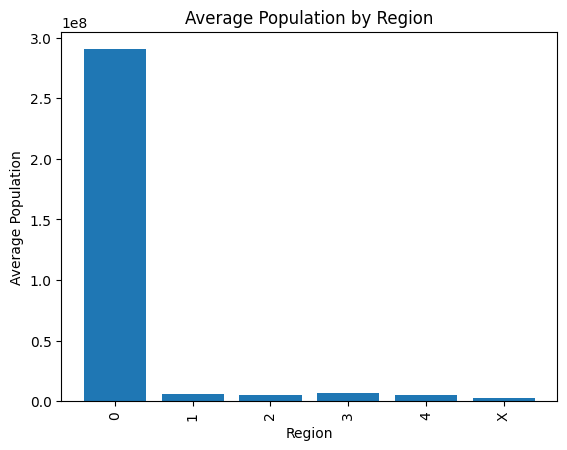

In [34]:
region_pop = df.groupby('REGION')[['POPESTIMATE2018','POPEST18PLUS2018']].mean().mean(axis=1)
plt.bar(region_pop.index, region_pop.values)
plt.xlabel('Region')
plt.ylabel('Average Population')
plt.title('Average Population by Region')
plt.xticks(rotation=90)
plt.show()

In [37]:
import json
from pathlib import Path
PATIENT_DATA = "/content/drive/MyDrive/patient.json"

In [42]:
patient = json.load(open(PATIENT_DATA))
patient

{'resourceType': 'Patient',
 'id': 'example',
 'identifier': [{'use': 'usual',
   'type': {'coding': [{'system': 'http://terminology.hl7.org/CodeSystem/v2-0203',
      'code': 'MR'}]},
   'system': 'urn:oid:1.2.36.146.595.217.0.1',
   'value': '12345',
   'period': {'start': '2001-05-06'},
   'assigner': {'display': 'Acme Healthcare'}}],
 'active': True,
 'name': [{'use': 'official',
   'family': 'Chalmers',
   'given': ['Peter', 'James']},
  {'use': 'usual', 'given': ['Jim']},
  {'use': 'maiden',
   'family': 'Windsor',
   'given': ['Peter', 'James'],
   'period': {'end': '2002'}}],
 'telecom': [{'use': 'home'},
  {'system': 'phone', 'value': '(03) 5555 6473', 'use': 'work', 'rank': 1},
  {'system': 'phone', 'value': '(03) 3410 5613', 'use': 'mobile', 'rank': 2},
  {'system': 'phone',
   'value': '(03) 5555 8834',
   'use': 'old',
   'period': {'end': '2014'}}],
 'gender': 'male',
 'birthDate': '1974-12-25',
 '_birthDate': {'extension': [{'url': 'http://hl7.org/fhir/StructureDefinitio

In [43]:
# 1. Patient's full official name
official_name = [name for name in patient['name'] if name['use'] == 'official'][0]
given_names = ' '.join(official_name['given'])
family_name = official_name['family']
full_name = f"{given_names} {family_name}"
print(f"Full Official Name: {full_name}")

# 2. Gender and birth date
gender = patient['gender']
birth_date = patient['birthDate']
print(f"Gender: {gender}")
print(f"Birth Date: {birth_date}")

# 3. Current address (city, state, postal code)
current_address = patient['address'][0]  # First address in the list
city = current_address['city']
state = current_address['state']
postal_code = current_address['postalCode']
print(f"Address: {city}, {state} {postal_code}")

Full Official Name: Peter James Chalmers
Gender: male
Birth Date: 1974-12-25
Address: PleasantVille, Vic 3999


In [44]:
phone_numbers = [telecom for telecom in patient['telecom'] if telecom.get('system') == 'phone']
print(f"\nTotal Phone Numbers: {len(phone_numbers)}")
print("Phone Types:")
for phone in phone_numbers:
    phone_type = phone.get('use', 'N/A')
    phone_value = phone.get('value', 'N/A')
    print(f"  - {phone_type}: {phone_value}")


Total Phone Numbers: 3
Phone Types:
  - work: (03) 5555 6473
  - mobile: (03) 3410 5613
  - old: (03) 5555 8834
